# Вводная часть

In [417]:
from sklearn import datasets 
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np
from sklearn.datasets import make_blobs
from numpy.random import default_rng

Сгенерируем исходные данные

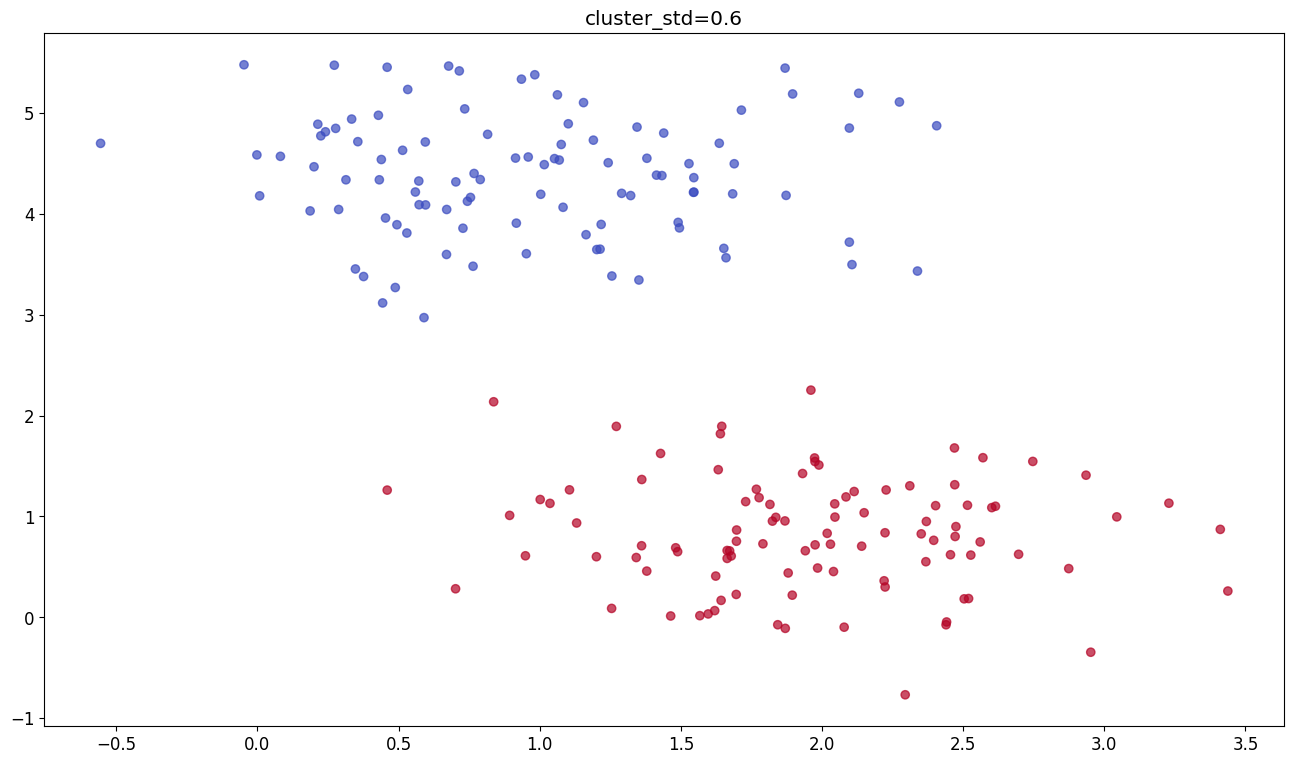

In [418]:
n_s = 200
cl_std = 0.6
X, y = datasets.make_blobs(n_samples=n_s, n_features=2, centers=2, random_state=0, cluster_std=cl_std)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, alpha=0.7)
plt.title(f"cluster_std={cl_std}")
plt.show()

# Описание алгоритма k-ближайших соседей



Алгоритм k-ближайших соседей (k-NN) является простым алгоритмом классификации и регрессии, который использует набор данных для определения класса (или значения) новых точек.

Алгоритм k-NN работает следующим образом:

1. Каждая точка в тренировочной выборке представляет собой вектор признаков в n-мерном пространстве.

2. Когда поступает новый объект, модель находит k наиболее близких точек в тренировочной выборке (ближайших соседей) к новой точке, используя некоторую метрику расстояния (обычно используется Евклидово расстояние).

3. Определяется класс новой точки, основываясь на классах k ближайших соседей. В случае классификации, класс, который наиболее часто встречается среди k ближайших соседей, становится предсказанным классом для новой точки. В случае регрессии, значение новой точки определяется как среднее значение k ближайших соседей.

4. Определение k - количества соседей, которые будут использоваться для определения класса новой точки, является гиперпараметром алгоритма. Он может быть найден путем перебора нескольких значений k на тестовых данных и выбора наилучшего значения.

Преимущества алгоритма k-NN включают простоту реализации, независимость от распределения классов в данных, способность работать с многомерными данными и возможность обновления модели с появлением новых данных. Недостатки алгоритма включаются вычислительную сложность (особенно при больших объемах данных), необходимость хранения всех тренировочных данных и неэффективность при высокой размерности пространства признаков.

# Реализация собственного алгоритма K ближайших соседей



In [419]:
class KNeighborsСlassifier:
    def fit(self, data, classes):
        # Инициализация признаков и классов
        self.X = data
        self.y = classes
        
        # Количество уникальных классов
        self.count_classes = classes.max() + 1
        return self
        
    def classify(self, x, k, print_distances=False): 
        # Рассчитываем расстояние между вектором признаков x и каждым вектором в тренировочной выборке
        dists = [np.linalg.norm(self.X[i] - x) for i in range(len(self.X))]
        
        # Объединяем расстояния и соответствующие им классы в кортежи, сортируем по расстоянию
        marked_dists = list(zip(dists, self.y))
        marked_dists.sort() 
        
        # Считаем голоса за каждый класс среди k ближайших соседей
        scores = np.zeros(self.count_classes)
        for i in range(k):
            if print_distances:
                # Выводим расстояние до k ближайших соседей
                print(f"Дистанция до {i + 1} точки - {marked_dists[i][0]}. Сlass = {marked_dists[i][1]}")
            scores[marked_dists[i][1]] += 1
            
        # Возвращаем предсказанный класс
        return np.argmax(scores)
    
    def predict(self, X_test, k):
        # Создаем пустой массив для предсказаний
        predictions = np.empty(len(X_test))
        for i in range(len(X_test)):
            # Классифицируем каждую точку в тестовой выборке
            predictions[i] = self.classify(X_test[i], k)
            
        # Возвращаем массив с предсказаниями
        return predictions

In [420]:
knn = KNeighborsСlassifier()

In [421]:
knn.fit(X, y)

Создадим 3 тестовых объекта и вернем нормальное значение для cluster_std


In [422]:
test_dots = [[0, 0],
             [3, 5],
             [2, 2.5]]

X, y = make_blobs(n_samples=n_s, centers=2, n_features=2, random_state=0, cluster_std=cl_std)

Дистанция до 1 точки - 0.7572654424161939. Сlass = 1
Дистанция до 2 точки - 1.1289742249138806. Сlass = 1
Дистанция до 3 точки - 1.2579099356839571. Сlass = 1
Дистанция до 4 точки - 1.3426290485260024. Сlass = 1
Дистанция до 5 точки - 1.34313212440583. Сlass = 1
Дистанция до 6 точки - 1.3491933596719885. Сlass = 1
Дистанция до 7 точки - 1.4536273611128716. Сlass = 1
Дистанция до 8 точки - 1.4640335075539934. Сlass = 1
Дистанция до 9 точки - 1.4673666867439352. Сlass = 1
Дистанция до 10 точки - 1.4676753240773286. Сlass = 1
Класс тест-точки - 1


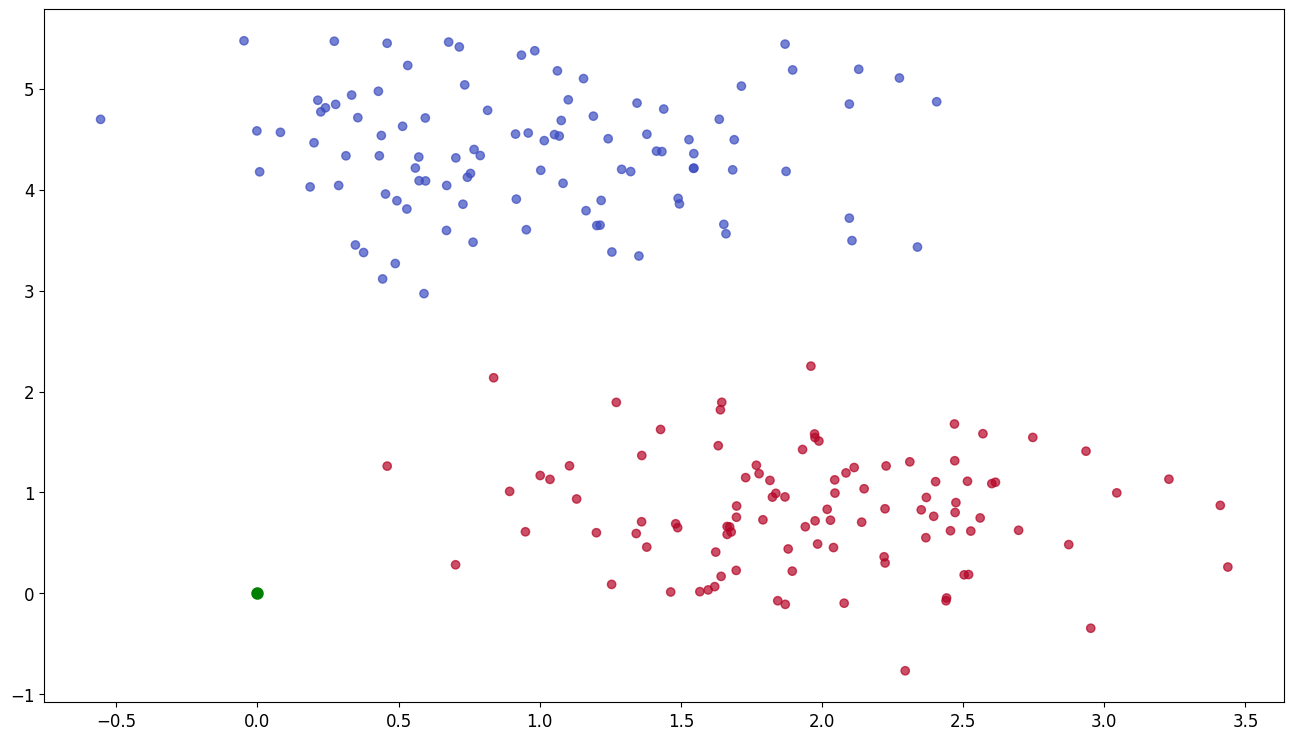

In [423]:
t = test_dots[0]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(t[0], t[1], c='g', linewidth=3)
print("Класс тест-точки -", knn.classify(t, 10, print_distances=True))

Дистанция до 1 точки - 0.607804488574716. Сlass = 0
Дистанция до 2 точки - 0.7334453543911538. Сlass = 0
Дистанция до 3 точки - 0.8909206136748837. Сlass = 0
Дистанция до 4 точки - 0.9159928146625596. Сlass = 0
Дистанция до 5 точки - 1.119521276006894. Сlass = 0
Дистанция до 6 точки - 1.2138469144100625. Сlass = 0
Дистанция до 7 точки - 1.285802778504881. Сlass = 0
Дистанция до 8 точки - 1.393567643897026. Сlass = 0
Дистанция до 9 точки - 1.39719661950283. Сlass = 0
Дистанция до 10 точки - 1.4051953833324127. Сlass = 0
Класс тест-точки - 0


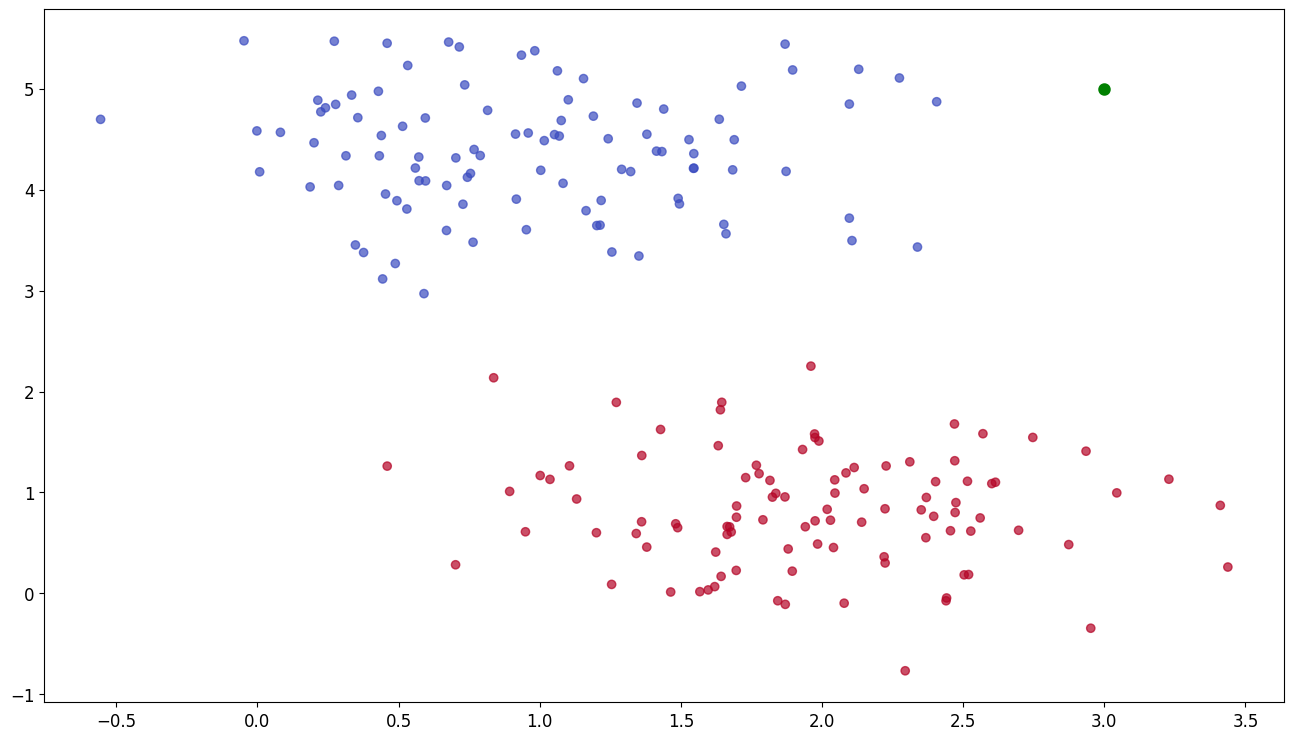

In [424]:
t = test_dots[1]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(t[0], t[1], c='g', linewidth=3)
print("Класс тест-точки -", knn.classify(t, 10, print_distances=True))

Дистанция до 1 точки - 0.2513982171596592. Сlass = 1
Дистанция до 2 точки - 0.7029184830260377. Сlass = 1
Дистанция до 3 точки - 0.7698486387955857. Сlass = 1
Дистанция до 4 точки - 0.9205773476158658. Сlass = 1
Дистанция до 5 точки - 0.9457938678563407. Сlass = 1
Дистанция до 6 точки - 0.9486484631525117. Сlass = 1
Дистанция до 7 точки - 0.9560157723261236. Сlass = 1
Дистанция до 8 точки - 0.9902944412639826. Сlass = 1
Дистанция до 9 точки - 0.990656733649371. Сlass = 0
Дистанция до 10 точки - 1.0007784625430434. Сlass = 0
Класс тест-точки - 1


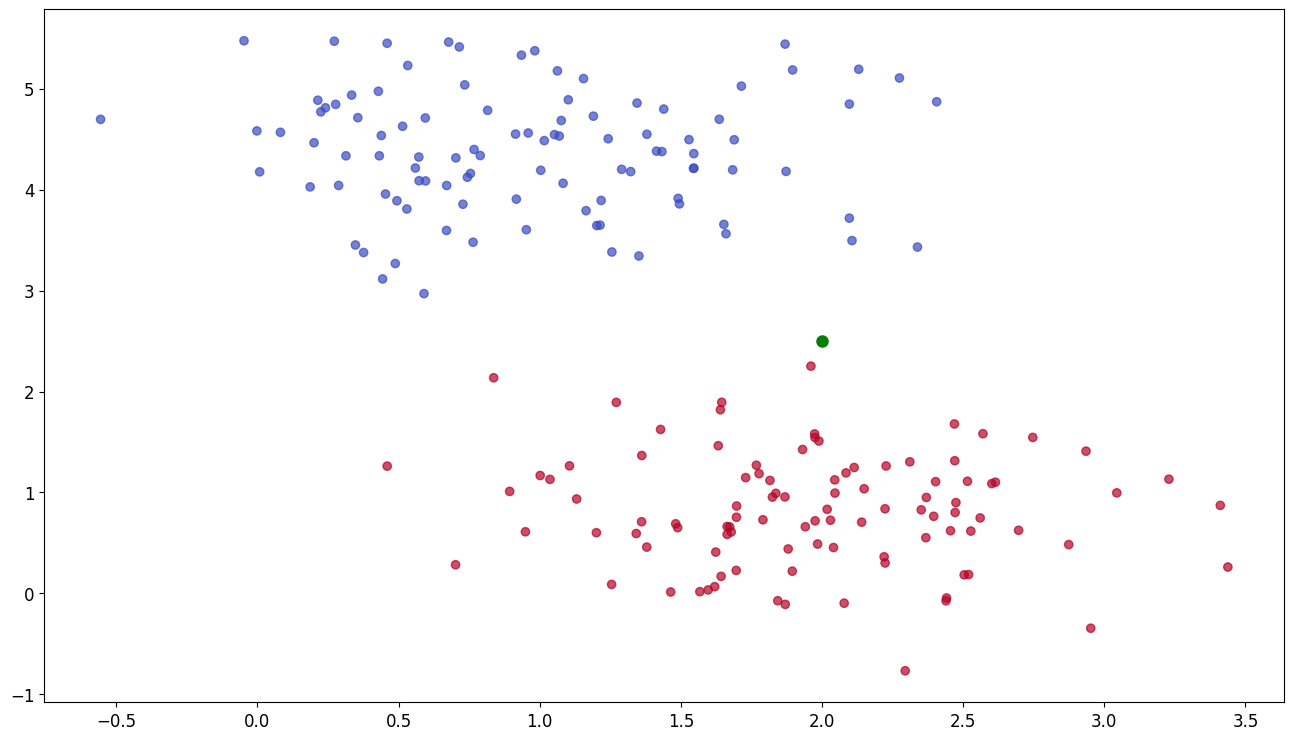

In [425]:
t = test_dots[2]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(t[0], t[1], c='g', linewidth=3)
print("Класс тест-точки -", knn.classify(t, 10, print_distances=True))

# Метод K ближайших соседей с помощью sklearn

In [426]:
from sklearn import neighbors

print("Тестовая выборка:\n", test_dots)

print("{:<4}|{:<16}|{:<16}|{:<15}".format("Номер", "Sklearn", "Написанный", "Совпадение"))
print("-" * 56)

for k in range(1, 31, 1):
    skl_knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    skl_knn.fit(X, y)

    my_knn = KNeighborsСlassifier().fit(X, y)
    my_prediction = my_knn.predict(test_dots, k)

    skl_prediction = skl_knn.predict(test_dots)

    matches = 1 if np.array_equal(my_prediction, skl_prediction) else 0

    print("{:<4}|{:<16}|{:<16}|{:<15}".format(k, str(skl_prediction), str(my_prediction), str(matches)))

Тестовая выборка:
 [[0, 0], [3, 5], [2, 2.5]]
Номер|Sklearn         |Написанный      |Совпадение     
--------------------------------------------------------
1   |[1 0 1]         |[1. 0. 1.]      |1              
2   |[1 0 1]         |[1. 0. 1.]      |1              
3   |[1 0 1]         |[1. 0. 1.]      |1              
4   |[1 0 1]         |[1. 0. 1.]      |1              
5   |[1 0 1]         |[1. 0. 1.]      |1              
6   |[1 0 1]         |[1. 0. 1.]      |1              
7   |[1 0 1]         |[1. 0. 1.]      |1              
8   |[1 0 1]         |[1. 0. 1.]      |1              
9   |[1 0 1]         |[1. 0. 1.]      |1              
10  |[1 0 1]         |[1. 0. 1.]      |1              
11  |[1 0 1]         |[1. 0. 1.]      |1              
12  |[1 0 1]         |[1. 0. 1.]      |1              
13  |[1 0 1]         |[1. 0. 1.]      |1              
14  |[1 0 1]         |[1. 0. 1.]      |1              
15  |[1 0 1]         |[1. 0. 1.]      |1              
16  |[1 0 1]    

# Support Vector Machine с помощью Scikit-Learn

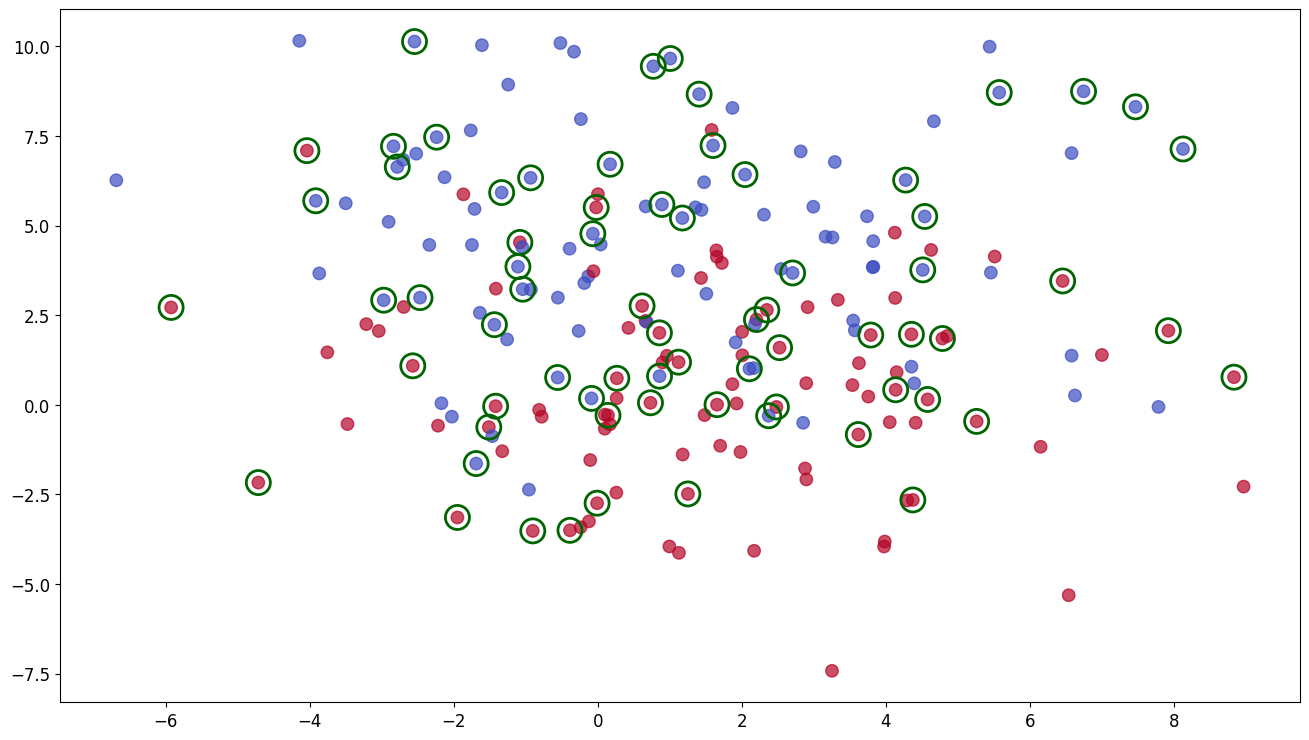

In [427]:
n = 70 # Задаем количество объектов для тестирования классификаторов

cl_std2 = 3

X, y = datasets.make_blobs(n_samples=n_s, n_features=2, centers=2, random_state=0, cluster_std=cl_std2)
# Задаем параметры генерации случайных данных, чтобы увеличить разброс точек в кластерах.

X_train, y_train, X_test, y_test = X[n:], y[n:], X[:n], y[:n] # Разбиваем сгенерированные данные на тестовую и обучающую выборки, используя n объектов для тестирования

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=80, alpha=0.7)
# Добавляем точки на график, раскрашивая их в зависимости от класса (y) с помощью функции scatter() из библиотеки pyplot.

plt.scatter(X_test[:, 0], X_test[:, 1], facecolor='none', edgecolor='darkgreen', s=300, linewidth=2)
# Добавляем точки тестовой выборки на график с помощью функции scatter(), но без заливки цветом (facecolor='none').

plt.show()

Следующий код создает модель опорных векторов (SVM) и обучает ее на обучающих данных X_train и y_train. Затем модель используется для предсказания классов тестовых данных X_test, и точность предсказаний оценивается с помощью функции accuracy_score из библиотеки sklearn.metrics. Результатом является доля правильно предсказанных классов.

In [428]:
from sklearn import svm
from sklearn.metrics import accuracy_score

model_svc_linear = svm.SVC(kernel="linear")
model_svc_linear.fit(X_train, y_train)

y_pred = model_svc_linear.predict(X_test)
accuracy_score(y_test, y_pred)

0.8

In [429]:
def visualize_svm(model, X_data, y_data, title="", resolution=10):

    s_vectors = model.support_vectors_
    
    plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, cmap=plt.cm.coolwarm, s=30)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], resolution)
    yy = np.linspace(ylim[0], ylim[1], resolution)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])
    
    plt.scatter(s_vectors[:, 0], s_vectors[:, 1], linewidth=1, s=100,
                facecolors="none", edgecolors="black", label='Support vectors')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(title)
    plt.legend()
    plt.show()


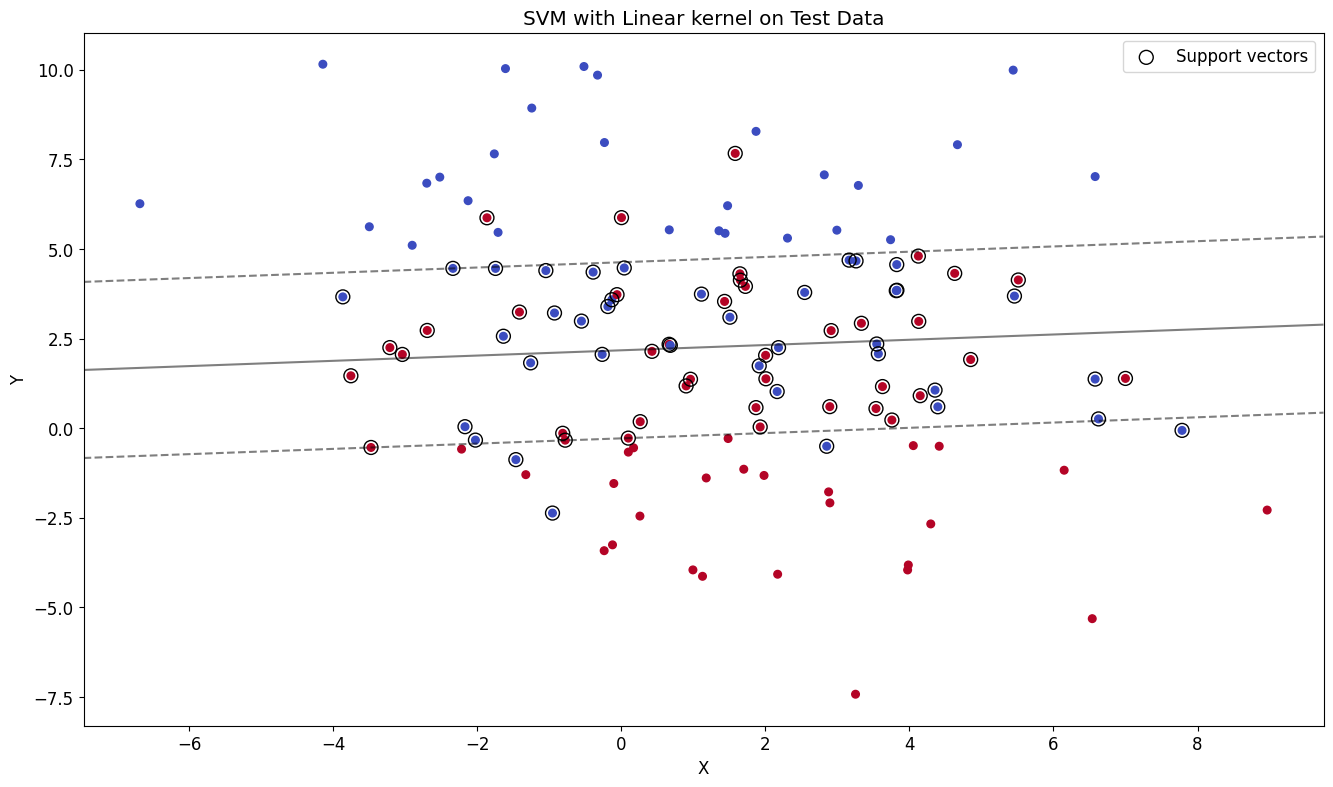

In [430]:
visualize_svm(model_svc_linear, X_train, y_train, "SVM with Linear kernel on Test Data", 10)

In [431]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели SVM
model_svc_linear = svm.SVC(kernel="linear")
model_svc_linear.fit(X_train, y_train)

# Оценка качества модели на тестовой выборке
y_pred = model_svc_linear.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8166666666666667


# Наивный байесовский классификатор

In [432]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

def visualize_bayes(model, X_data, y_data, title="", resolution=10):
    plt.figure(figsize=(16, 9))
    
    # Generate grid based on the minimum and maximum values of the features in the training set
    x_min, x_max = X_data[:, 0].min() - 1, X_data[:, 0].max() + 1
    y_min, y_max = X_data[:, 1].min() - 1, X_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 1/resolution),
                         np.arange(y_min, y_max, 1/resolution))
    xy = np.c_[xx.ravel(), yy.ravel()]

    # Predict the class for each point on the grid
    Z = model.predict(xy)
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the training points
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)
    plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, cmap=plt.cm.coolwarm, s=30)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(title)
    plt.show()

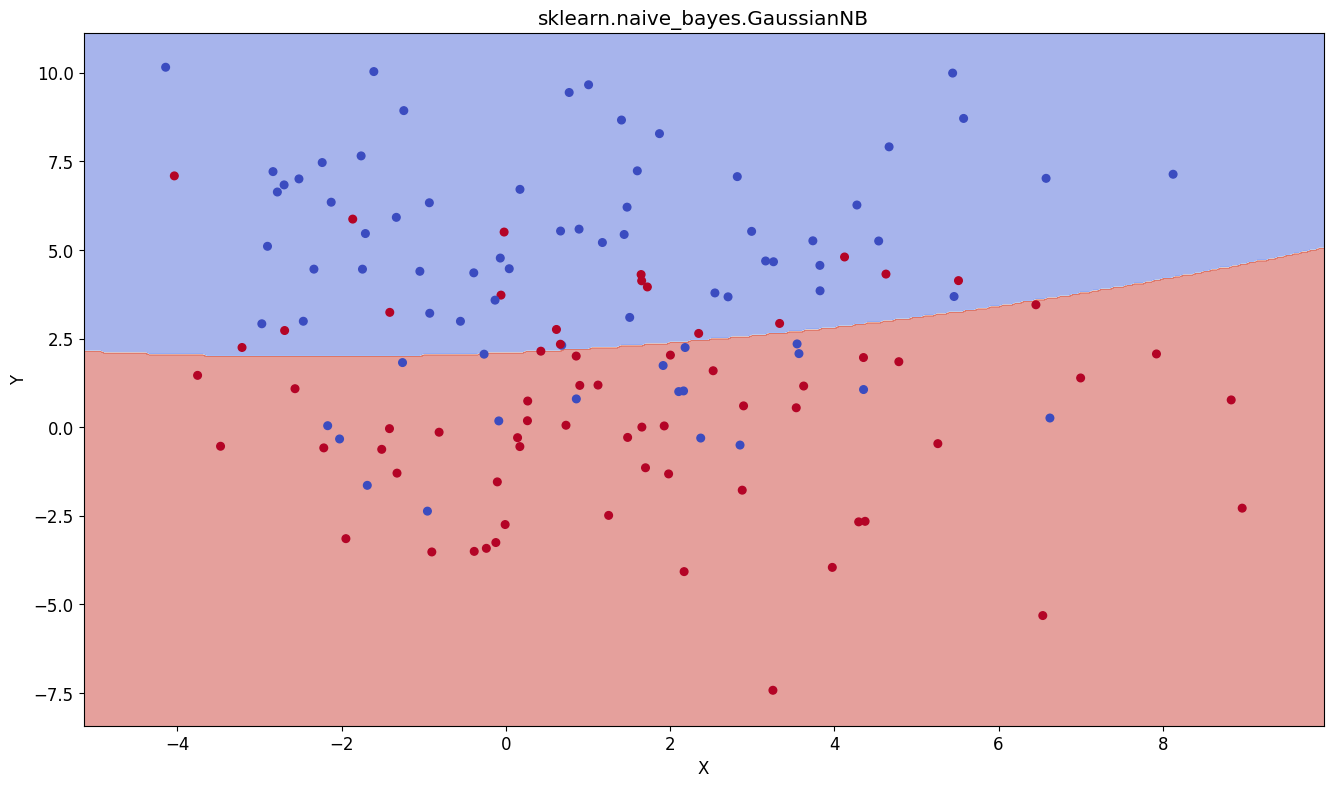

In [433]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

visualize_bayes(model_nb, X_train, y_train, "sklearn.naive_bayes.GaussianNB", 20)

# Сравнение результатов

In [434]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Оценка модели SVM
svm_pred = model_svc_linear.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)
svm_auc = roc_auc_score(y_test, svm_pred)

# Оценка модели наивного байесовского классификатора
gnb_pred = model_nb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_pred)
gnb_precision = precision_score(y_test, gnb_pred)
gnb_recall = recall_score(y_test, gnb_pred)
gnb_f1 = f1_score(y_test, gnb_pred)
gnb_auc = roc_auc_score(y_test, gnb_pred)

# Вывести результаты
print("Результаты для модели SVM:")
print("Точность: {:.3f}".format(svm_accuracy))
print("Точность предсказания: {:.3f}".format(svm_precision))
print("Полнота: {:.3f}".format(svm_recall))
print("F1-мера: {:.3f}".format(svm_f1))
print("AUC-ROC: {:.3f}".format(svm_auc))

print("\nРезультаты для модели Gaussian Naive Bayes:")
print("Точность: {:.3f}".format(gnb_accuracy))
print("Точность предсказания: {:.3f}".format(gnb_precision))
print("Полнота: {:.3f}".format(gnb_recall))
print("F1-мера: {:.3f}".format(gnb_f1))
print("AUC-ROC: {:.3f}".format(gnb_auc))

Результаты для модели SVM:
Точность: 0.817
Точность предсказания: 0.844
Полнота: 0.818
F1-мера: 0.831
AUC-ROC: 0.816

Результаты для модели Gaussian Naive Bayes:
Точность: 0.783
Точность предсказания: 0.833
Полнота: 0.758
F1-мера: 0.794
AUC-ROC: 0.786


### Таким образом, можно сделать вывод, что:
* Обе модели имеют достаточно высокую точность и точность предсказания (precision), что означает, что они правильно классифицируют многие объекты в тестовой выборке. Однако модель SVM имеет более высокую полноту (recall), что означает, что она лучше находит и классифицирует положительные случаи.

* F1-мера является сбалансированной метрикой, учитывающей как точность, так и полноту, и показывает, что модель SVM имеет более высокую сбалансированную производительность, чем модель Gaussian Naive Bayes.

* AUC-ROC - это метрика, оценивающая общую производительность модели во всех возможных пороговых значениях. Модель SVM имеет немного более высокое значение AUC-ROC, что также указывает на ее более высокую производительность по сравнению с моделью Gaussian Naive Bayes.

В целом, на основании этих результатов можно сделать вывод, что модель SVM имеет более высокую производительность и более подходит для этой задачи классификации.

# Список используемой литературы:

1. Официальная документация Scikit-Learn: https://scikit-learn.org/stable/modules/svm.html
2. Статья на Medium о применении SVM для классификации: https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47
3. Введение в машинное обучение с помощью Python и Scikit-Learn (глава 5): https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
4. SVM. Разделяющая гиперплоскость с максимальной погрешностью: https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html